# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [354]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [355]:
df_obesity = pd.read_csv("obesity_cleaned.csv")

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [356]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


In [357]:
df_obesity.drop('Unnamed: 0', axis=1, inplace=True)

In [358]:
df_obesity['Obesity']=df_obesity['Obesity (%)'].apply(lambda x: x.split()[0])

In [359]:
df_obesity['Obesity'].value_counts()

No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
60.1      1
56.3      1
59.8      1
55.5      1
46.5      1
Name: Obesity, Length: 602, dtype: int64

In [360]:
df_obesity.loc[df_obesity['Obesity']=='No','Obesity'] = np.nan

In [361]:
df_obesity['Obesity'] = df_obesity['Obesity'].dropna()

In [362]:
df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x: float(x))
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))

In [363]:
df_obesity

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [364]:
df_obesity.index.unique()

RangeIndex(start=0, stop=24570, step=1)

In [365]:
df_obesity.set_index('Year', inplace=True)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [366]:
df_2015 = df_obesity.loc[df_obesity.index == 2015]

df_2015.groupby('Sex').agg({'Obesity': 'mean'})

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [367]:
#periodo observado: você próprio que define!

df_periodo_inicial = df_obesity.loc[(df_obesity.index == 1975) & (df_obesity['Sex']=='Both sexes')]
df_periodo_final = df_obesity.loc[(df_obesity.index == 2016) & (df_obesity['Sex']=='Both sexes')]

In [368]:
df_cinco_paises = pd.DataFrame()

In [369]:
df_cinco_paises['Período_inicial'] = df_periodo_inicial['Obesity'].values

In [370]:
df_cinco_paises['Country'] = df_periodo_inicial['Country'].values

In [371]:
df_cinco_paises['Período_final'] = df_periodo_final['Obesity'].values

In [372]:
df_cinco_paises['Country_final'] = df_periodo_final['Country'].values

In [373]:
df_cinco_paises

,Período_inicial,Country,Período_final,Country_final
0,0.5,Afghanistan,5.5,Afghanistan
1,6.5,Albania,21.7,Albania
2,6.9,Algeria,27.4,Algeria
3,12.9,Andorra,25.6,Andorra
4,0.8,Angola,8.2,Angola
...,...,...,...,...
190,9.6,Venezuela (Bolivarian Republic of),25.6,Venezuela (Bolivarian Republic of)
191,0.1,Viet Nam,2.1,Viet Nam
192,2.8,Yemen,17.1,Yemen
193,1.5,Zambia,8.1,Zambia


In [374]:
df_cinco_paises['Variação'] = df_cinco_paises['Período_final'] - df_cinco_paises['Período_inicial']

In [375]:
df_cinco_paises = df_cinco_paises.sort_values(by='Variação', ascending=False).dropna()

In [376]:
df_cinco_paises.head(5)

,Período_inicial,Country,Período_final,Country_final,Variação
180,17.9,Tuvalu,51.6,Tuvalu,33.7
126,18.9,Niue,50.0,Niue,31.1
90,15.9,Kiribati,46.0,Kiribati,30.1
175,19.9,Tonga,48.2,Tonga,28.3
39,28.0,Cook Islands,55.9,Cook Islands,27.9


In [377]:
df_cinco_paises.tail(5)

,Período_inicial,Country,Período_final,Country_final,Variação
173,0.2,Timor-Leste,3.8,Timor-Leste,3.6
13,0.2,Bangladesh,3.6,Bangladesh,3.4
86,1.0,Japan,4.3,Japan,3.3
156,3.0,Singapore,6.1,Singapore,3.1
191,0.1,Viet Nam,2.1,Viet Nam,2.0


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [378]:
df_2015 = df_obesity.loc[df_obesity.index==2015]

In [379]:
df_2015 = df_2015.loc[df_2015['Sex']=='Both sexes']

In [380]:
df_2015.sort_values(by='Obesity',ascending=False, inplace=True)

In [381]:
df_2015.dropna(axis=0,inplace=True)

In [382]:
df_2015[df_2015['Obesity'] == df_2015['Obesity'].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,60.7 [55.2-66.1],Both sexes,60.7


In [383]:
df_2015[df_2015['Obesity'] == df_2015['Obesity'].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,2.0 [1.3-2.9],Both sexes,2.0


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [384]:
df_brasil = df_obesity.loc[df_obesity['Country']=='Brazil']

<AxesSubplot: xlabel='Year'>

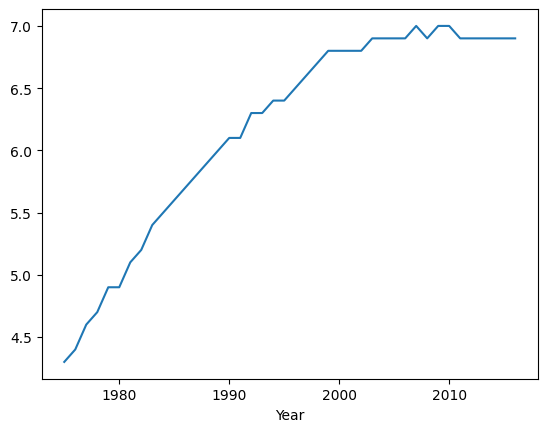

In [385]:
(df_brasil[df_brasil['Sex']=='Female']['Obesity'] - df_brasil[df_brasil['Sex']=='Male']['Obesity']).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [386]:
df_mundo = df_obesity[df_obesity['Sex']=='Both sexes']

In [387]:
df_mundo

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1977,Afghanistan,0.6 [0.2-1.2],Both sexes,0.6
1978,Afghanistan,0.6 [0.2-1.3],Both sexes,0.6
1979,Afghanistan,0.6 [0.3-1.3],Both sexes,0.6
...,...,...,...,...
2012,Zimbabwe,14.3 [11.4-17.6],Both sexes,14.3
2013,Zimbabwe,14.6 [11.5-18.0],Both sexes,14.6
2014,Zimbabwe,14.9 [11.7-18.4],Both sexes,14.9


<AxesSubplot: xlabel='Year'>

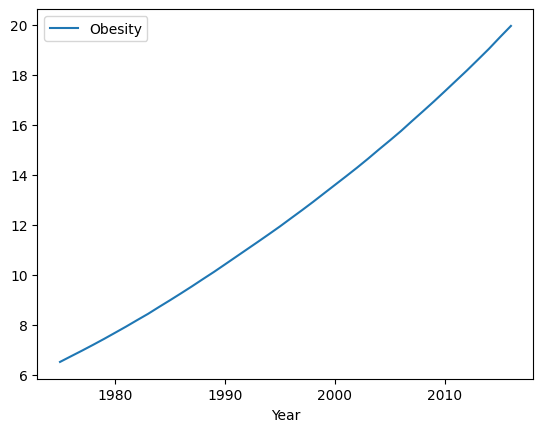

In [388]:
df_mundo.groupby('Year').agg({'Obesity':'mean'}).plot()

## Perguntas - GDP Per Person (1901-2011)

In [389]:
df_gdp = pd.read_csv("gdp.csv", decimal=".")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [390]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [391]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [392]:
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [393]:
df_gdp['Year'].iloc[0].split('/')[-1]

'1901'

In [394]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x: int(x.split('/')[-1]))

In [395]:
df_gdp[' GDP_pp '].iloc[1000].replace(',','')

' 7855.58 '

In [396]:
df_gdp['GDP_pp'] = df_gdp[' GDP_pp '].apply(lambda x: float(x.replace(',','')))

In [397]:
df_gdp.drop(' GDP_pp ', axis=1, inplace=True)

In [398]:
df_gdp.head(10)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
5,Afghanistan,"Middle East, North Africa, and Greater Arabia",1926,677.87
6,Afghanistan,"Middle East, North Africa, and Greater Arabia",1931,693.71
7,Afghanistan,"Middle East, North Africa, and Greater Arabia",1936,709.91
8,Afghanistan,"Middle East, North Africa, and Greater Arabia",1941,726.49
9,Afghanistan,"Middle East, North Africa, and Greater Arabia",1946,743.46


In [399]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4419 non-null   object 
 1   Region   4419 non-null   object 
 2   Year     4419 non-null   int64  
 3   GDP_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


- Você conseguiria informar o primeiro valor registrado de cada país?

In [400]:
df_a = df_gdp.groupby('Country').agg({'Year':'min','GDP_pp':'first'})

In [401]:
df_a

,Year,GDP_pp
Country,,
Afghanistan,1901,613.99
Albania,1901,1062.01
Algeria,1901,1807.76
Andorra,1901,3352.50
Angola,1901,525.76
...,...,...
Venezuela,1901,766.21
Vietnam,1901,572.96
"Yemen, Rep.",1901,729.39


In [402]:
df_a['GDP_pp'].idxmin()

'Lesotho'

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [403]:
df_gdp['Year'].unique()

array([1901, 1906, 1911, 1916, 1921, 1926, 1931, 1936, 1941, 1946, 1951,
       1956, 1961, 1966, 1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006,
       2011], dtype=int64)

In [404]:
df_gdp_seculo_start = df_gdp.loc[df_gdp['Year'] == 1901]

In [405]:
df_gdp_seculo_end = df_gdp.loc[df_gdp['Year']== 1996 ]

In [406]:
((df_gdp_seculo_end.groupby('Region')['GDP_pp'].mean() / df_gdp_seculo_start.groupby('Region')['GDP_pp'].mean()-1)*100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: GDP_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [407]:
#forma mais rápida

In [408]:
#anos = list(range(1901,2012,1))
#paises = list(df_gdp['Country'].unique())
#new_index = pd.MultiIndex.from_product([paises, anos])
#df_gdp.set_index(['Country', 'Year']).reindex(new_index)[['GDP_pp']].interpolate()

In [409]:
#forma trabalhada manualmente

Criando coluna de datas que estavam faltando no dataset

In [410]:
arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_year, columns=["Year"])
df_all_years.index = df_all_years["Year"]

df_years_off = ~df_all_years['Year'].isin(df_gdp['Year'])


In [411]:
df_years_off = df_all_years.loc[df_years_off].index

In [412]:
df_years_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [413]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


Preencher os valores do dataframe contendo as estimativas.

In [414]:
df_gdp = df_gdp.sort_values(['Country', 'Year'])

In [415]:
df_gdp["delta_gdp"] = df_gdp["GDP_pp"] - df_gdp["GDP_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)

In [416]:
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [417]:
df_gdp

,Country,Region,Year,GDP_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [418]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [419]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue
    
    years_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off > row["Year"])]
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row["GDP_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["GDP_pp"]
        add_row["Year"] = new_year
        add_row["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])
        

In [420]:
df_new_data

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [421]:
df_gdp = pd.concat([df_gdp, df_new_data])

In [422]:
df_gdp.sort_values(['Country', 'Year'], inplace=True)

In [423]:
df_gdp.index = df_gdp["Year"]

In [424]:
df_gdp["kind"].fillna("real", inplace=True)

In [425]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Year', ylabel='GDP_pp'>

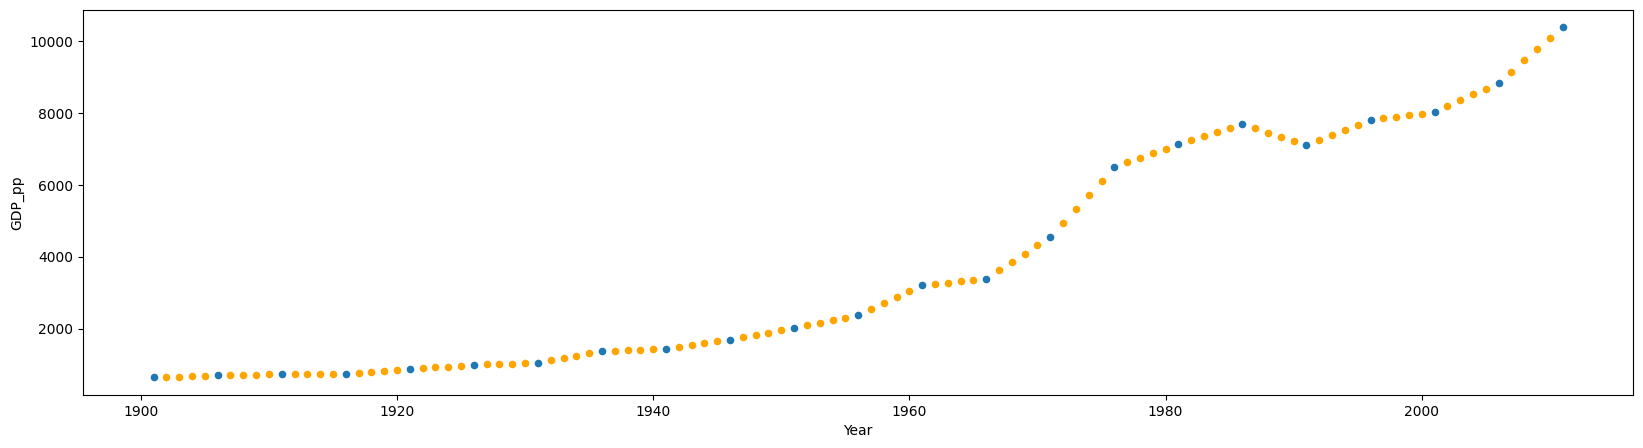

In [426]:
fig, ax = plt.subplots(figsize = (20,5))

country = "Brazil"
df_gdp[(df_gdp["kind"]=='real') & (df_gdp["Country"]== country)].plot(kind="scatter", y='GDP_pp', x='Year', ax=ax)
df_gdp[(df_gdp["kind"]=='estimated') & (df_gdp["Country"]== country)].plot(kind="scatter", y='GDP_pp', x='Year', ax=ax, color='orange')

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [428]:
df_gdp['Year'] = df_gdp["Year"].astype(int)
df_gdp['GDP_pp'] = df_gdp['GDP_pp'].astype(float)

In [430]:
import plotly.express as px

df = px.data.gapminder()

In [431]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [434]:
dict_iso_alpha = df.set_index('country').to_dict()['iso_alpha']

In [435]:
dict_num = {j: i for i, j in enumerate(df_gdp['Country'].unique())}

In [432]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [436]:
df_gdp['iso_alpha'] = df_gdp['Country'].map(dict_iso_alpha)
df_gdp['iso_num'] = df_gdp['Country'].map(dict_num)

fig = px.choropleth(df_gdp[df_gdp["kind"]=="real"].reset_index(drop=True), locations="iso_alpha", color="GDP_pp", hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)
fig.show()


- Há uma relação entre níveis de obesidade e gdp per capita?

In [437]:
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [440]:
df_obesity['country-year'] = df_obesity['Country'] + "-" + df_obesity.reset_index()['Year'].apply(lambda x: str(int(x))).values

In [441]:
dict_obesity_year = df_obesity.set_index('country-year').to_dict()['Obesity']

In [438]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num
Year,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0
...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192


In [442]:
df_gdp['country-year'] = df_gdp['Country'] + "-" + df_gdp['Year'].apply(lambda x: str(int(x))).values

In [443]:
df_gdp['Obesity'] = df_gdp['country-year'].map(dict_obesity_year)

In [444]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009,22.2


In [445]:
df_gdp_clean = df_gdp.dropna()

In [449]:
df_gdp_clean.reset_index(drop=True).groupby('Year')[['Obesity','GDP_pp']].mean().corr()

,Obesity,GDP_pp
Obesity,1.000000,0.969378
GDP_pp,0.969378,1.000000
